# 자연처리 프레임워크 및 라이브러리 설치하기

In [1]:
# colab에 Mecab설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [2]:
%cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [3]:
!git clone https://github.com/e9t/nsmc/

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 22.77 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Checking out files: 100% (14737/14737), done.


In [4]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 165kB/s 
     |████████████████████████████████| 92kB 13.9MB/s 
     |████████████████████████████████| 450kB 43.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-28 00:19:05--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=y2FH4RLG7PCPTghB644MwqZsEMI%3D&Expires=1624841246&AWSAccessKeyId=AKIA6KOSE3BNJ

# 네이버 쇼핑 리뷰 데이터의 이해와 전처리

In [5]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 로드

In [6]:
# 데이터 다운 로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7fc83b07f510>)

In [7]:
# 열 제목 추가
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'],)
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [8]:
# 훈련 데이터 내용 확인
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


# 훈련데이터와 테스트 데이터 분리하기

In [9]:
# 평점으로 라벨링하기(4,5점=1, 1,2점=0)
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [10]:
# 중복 체크
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [11]:
# 중복 제거
total_data.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 199908


In [12]:
# NULL값 유무 체크
print(total_data.isnull().values.any())

False


In [13]:
# 훈련데이터와 테스트 데이터 분리 3:1
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 149931
테스트용 리뷰의 개수 : 49977


# 레이블 분포 확인

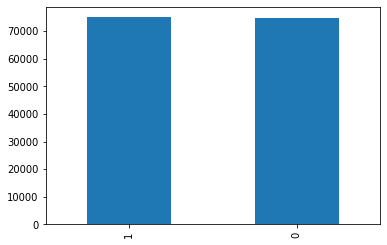

In [14]:
# 훈련 데이터에서의 레이블 값의 분포 확인
train_data['label'].value_counts().plot(kind = 'bar')

In [15]:
# 균일해보이지만 정확하게 몇개인지 확인해보자
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  74918
1      1  75013


# 데이터 정제하기

In [16]:
# 훈련데이터에 한글과 공백을 제외하고 모두 제거해보자
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ratings,reviews,label
59666,2,사이즈를 센치씩 늘린건데도 작아요 그리고 색상은 완전 달라요 칙칙한핑크네요ㅠㅠ 많이...,0
12433,2,ㅂ불만족 빗이 아픔 멍이피부에 빗질못해주겟네요,0
146516,1,이 제품쓰고 삼일만에 변기물이 잘 안내려갔어요 혹시나해서 다시 빼보니 물이 다시 잘...,0
158109,5,적당하고 만족합니다,1
70219,2,편하자고 이용하는 밀키튼데 손 은근 많이 가서 저는 패쓰요,0


In [17]:
# 공백 데이터를 null값으로 변경
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

ratings    0
reviews    0
label      0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [18]:
# test데이터에도 전처리 과정 진행
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 49977


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

# 토큰화

In [19]:
# 형태소 분석기 연습해보기 (KoNLPy의 Mecab)
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [20]:
# 불용어 정의 (한국어 조사, 접속사 등) = 23
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [21]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
train_data['tokenized'] = train_data['reviews'].copy().apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].copy().apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
print(train_data[:3])

        ratings  ...                                          tokenized
59666         2  ...  [사이즈, 센치, 씩, 늘린, 건데, 작, 아요, 그리고, 색상, 완전, 달라요, ...
12433         2  ...      [ㅂ, 불, 만족, 빗이, 아픔, 멍, 피부, 빗, 질, 못해, 주, 겟, 네요]
146516        1  ...  [제품, 쓰, 삼, 일, 만, 변기, 물, 잘, 안, 내려갔, 어요, 혹시나, 해서...

[3 rows x 4 columns]


In [23]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
test_data['tokenized'] = test_data['reviews'].copy().apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].copy().apply(lambda x: [item for item in x if item not in stopwords])

In [24]:
test_data[:5]

,ratings,reviews,label,tokenized
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0,"[너무, 낮, 솜, 적, 실망, 스럽, 습니다]"
125080,1,피부에 뾰루지가 많이 올라와요,0,"[피부, 뾰루지, 많이, 올라, 와요]"
122750,5,배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요,1,"[배송, 빠르, 네요, 가격, 대비, 좋, 것, 같, 아요, 첨, 힘들, 어, 하나..."
72927,5,재구매입니다 핏도 좋고 착용감도 좋습니다,1,"[재, 구매, 입니다, 핏, 좋, 착용감, 좋, 습니다]"
83890,1,파손제품 온거 출장같다 오늘 받았는데 현재상황 장난하시는지 택배회사 항의하세요,0,"[파손, 제품, 온, 거, 출장, 같, 오늘, 받, 았, 는데, 현재, 상황, 장난..."


# 단어와 길이 분포 확인하기

In [25]:
# 각 긍/부정 별 단어 빈도 체크
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [26]:
# 부정 단어 빈도수 카운트
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('네요', 31799), ('는데', 20295), ('안', 19718), ('어요', 14849), ('있', 13200), ('너무', 13058), ('했', 11783), ('좋', 9812), ('배송', 9677), ('같', 8997), ('구매', 8876), ('어', 8869), ('거', 8854), ('없', 8670), ('아요', 8642), ('습니다', 8436), ('그냥', 8355), ('되', 8345), ('잘', 8029), ('않', 7984)]


In [27]:
# 긍정 단어 빈도수 카운트
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('좋', 39488), ('아요', 21184), ('네요', 19895), ('어요', 18686), ('잘', 18602), ('구매', 16171), ('습니다', 13320), ('있', 12391), ('배송', 12275), ('는데', 11670), ('했', 9818), ('합니다', 9801), ('먹', 9635), ('재', 9273), ('너무', 8397), ('같', 7868), ('만족', 7261), ('거', 6482), ('어', 6294), ('쓰', 6292)]


긍정 리뷰의 평균 길이 : 13.587751456414221
부정 리뷰의 평균 길이 : 17.029512266744973


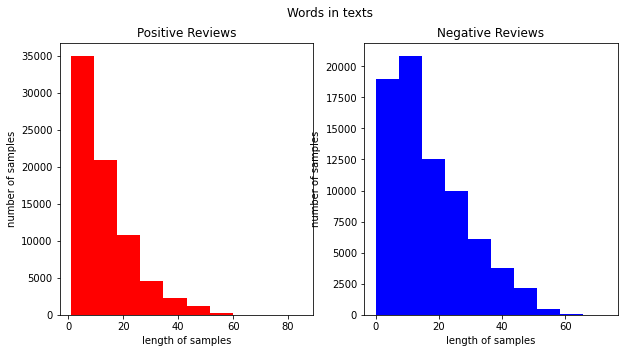

In [28]:
# 긍정, 부정 데이터별 길이 분포 체크
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [29]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

# 정수 인코딩

In [30]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 데이터를 정수로 변환
# 일단 단어 집합을 만들자
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [31]:
print(tokenizer.word_index)

{'네요': 1, '좋': 2, '어요': 3, '는데': 4, '아요': 5, '잘': 6, '있': 7, '구매': 8, '안': 9, '배송': 10, '습니다': 11, '했': 12, '너무': 13, '같': 14, '거': 15, '어': 16, '먹': 17, '합니다': 18, '되': 19, '재': 20, '요': 21, '기': 22, '쓰': 23, '않': 24, '없': 25, '것': 26, '아': 27, '해서': 28, '사용': 29, '로': 30, '았': 31, '나': 32, '으로': 33, '만': 34, '보다': 35, '었': 36, '주': 37, '겠': 38, '지만': 39, '보': 40, '아서': 41, '그냥': 42, '해': 43, '서': 44, '제품': 45, '면': 46, '어서': 47, '가격': 48, '해요': 49, '좀': 50, '만족': 51, '생각': 52, '주문': 53, '입니다': 54, '라': 55, '더': 56, '받': 57, '니': 58, '맛': 59, '할': 60, '많이': 61, '개': 62, '사': 63, '때': 64, '시': 65, '사이즈': 66, '에서': 67, '빠르': 68, '왔': 69, '샀': 70, '번': 71, '작': 72, '별로': 73, '음': 74, '맛있': 75, 'ㅠㅠ': 76, '포장': 77, '입': 78, '수': 79, '두': 80, '맞': 81, '던': 82, '다른': 83, '저렴': 84, '괜찮': 85, '세요': 86, '넘': 87, '못': 88, '상품': 89, '정말': 90, '하나': 91, '아니': 92, '에요': 93, 'ㅠ': 94, '냄새': 95, '데': 96, '부분': 97, '딱': 98, '감사': 99, '아주': 100, '용': 101, '인데': 102, 'ㅎㅎ': 103, '일': 104, '으면': 105, '진짜':

In [32]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 2회 미만 단어는 비중이 몇인지 체크
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 39998
등장 빈도가 1번 이하인 희귀 단어의 수: 18213
단어 집합에서 희귀 단어의 비율: 45.53477673883694
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7935688376196857


In [33]:
# 전체 단어 개수 중 빈도수 2미만인 단어는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 21787


In [34]:
# 단어집합을 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [35]:
print(X_train[:3])
print(X_test[:3])

[[67, 2060, 299, 14259, 263, 73, 6, 236, 168, 137, 805, 2951, 625, 2, 77, 62, 207, 40, 1343, 155, 3, 6], [482, 409, 52, 8530, 2561, 2517, 339, 2918, 250, 2357, 38, 473, 2], [46, 24, 825, 105, 35, 2372, 160, 7, 10, 8061, 4, 1319, 29, 140, 322, 41, 59, 160, 140, 7, 1916, 2, 113, 162, 1379, 323, 119, 136]]
[[14, 704, 767, 116, 186, 252, 12], [339, 3904, 62, 3816, 1651], [11, 69, 2, 49, 164, 3, 27, 15, 6, 513, 289, 17, 92, 110, 564, 59, 7, 2]]


In [36]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

# 빈 샘플(empty samples)제거

In [37]:
# 각 샘플의 길이가 0인 샘플들의 인덱스 확인
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [38]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

149930
149930


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

리뷰의 최대 길이 : 85
리뷰의 평균 길이 : 15.307643566997932


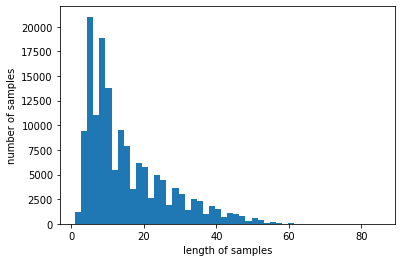

In [39]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [40]:
# 최적의 길이를 찾기 위해, 전체 샘플중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수 생성
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [41]:
# 30 이하 비율 체크
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.99933302207697


In [42]:
# 99%가 80이하 이므로 모든 샘플길이를 30으로 결정
# 짧은 데이터는 0을 채우고, 30을 넘는 긴 데이터는 손실됨
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [43]:
print(len(X_train))
print(len(X_test))

149930
49977


In [44]:
print(y_test[1])
print(y_test[:3])

0
[0 0 1]


# GRU으로 네이버 영화 리뷰 감성 분류하기

In [45]:
# 필요한 프레임워크 및 라이브러리 임포트
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [46]:
from tensorflow.python.keras.layers.recurrent_v2 import GRU
# 임베딩 벡터의 차원은 100으로, 리뷰분류를 위해 LSTM 사용
# 왜 100인지는 모름
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [47]:
# 검증 데이터 손실이 4회 증가하면 학습 조기 종료
# model check point를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [48]:
# 에포크 15번 수행, 훈련데이터중 20%를 검증데이터로 사용하며 정확도 체크
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
2000/2000 [==============================] - 39s 15ms/step - loss: 0.2732 - acc: 0.8977 - val_loss: 0.2362 - val_acc: 0.9128

Epoch 00001: val_acc improved from -inf to 0.91276, saving model to best_model.h5
Epoch 2/15
2000/2000 [==============================] - 30s 15ms/step - loss: 0.2154 - acc: 0.9219 - val_loss: 0.2327 - val_acc: 0.9165

Epoch 00002: val_acc improved from 0.91276 to 0.91649, saving model to best_model.h5
Epoch 3/15
2000/2000 [==============================] - 29s 15ms/step - loss: 0.1991 - acc: 0.9289 - val_loss: 0.2081 - val_acc: 0.9268

Epoch 00003: val_acc improved from 0.91649 to 0.92680, saving model to best_model.h5
Epoch 4/15
2000/2000 [==============================] - 29s 15ms/step - loss: 0.1880 - acc: 0.9331 - val_loss: 0.2025 - val_acc: 0.9269

Epoch 00004: val_acc improved from 0.92680 to 0.92690, saving model to best_model.h5
Epoch 5/15
2000/2000 [==============================] - 30s 15ms/step - loss: 0.1783 - acc: 0.9372 - val_loss: 0.20

In [49]:
# 테스트 데이터에서 정확도 측정
loaded_model = load_model('best_model.h5')
result = loaded_model.evaluate(X_test, y_test)
print("\n 테스트 손실률: ",result[0])
print("\n 테스트 손실률: ",result[1])
# evalute()[0] 손실률, [1] 정확도
# print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1562/1562 [==============================] - 6s 4ms/step - loss: 0.2078 - acc: 0.9259

 테스트 손실률:  0.2078329622745514

 테스트 손실률:  0.9259259104728699


# 리뷰 예측하기

In [50]:
# 학습한 모델에 새로운 예측값을 얻는 것은 model.predict() 사용
# 그리고 예측할 때에도 동일한 전처리 수행해야함.
loaded_model = load_model('best_model.h5')
def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [51]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')

98.41% 확률로 긍정 리뷰입니다.


In [52]:
sentiment_predict('진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?')

99.52% 확률로 부정 리뷰입니다.


In [53]:
sentiment_predict('판매자님... 너무 짱이에요.. 대박나삼')

98.53% 확률로 긍정 리뷰입니다.


In [54]:
sentiment_predict('ㅁㄴㅇㄻㄴㅇㄻㄴㅇ리뷰쓰기도 귀찮아')

96.48% 확률로 부정 리뷰입니다.


# 영화 리뷰를 예측해보면?

In [55]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ') # 확률이 확 떨어지네

84.32% 확률로 긍정 리뷰입니다.


In [56]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ') # 못잡네

68.39% 확률로 긍정 리뷰입니다.


In [57]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

82.52% 확률로 부정 리뷰입니다.


In [58]:
sentiment_predict('감독 뭐하는 놈이냐?')

91.36% 확률로 부정 리뷰입니다.


In [59]:
sentiment_predict('대박 감독 뭐하시는 분?')# 못잡네

65.94% 확률로 부정 리뷰입니다.


In [60]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

71.12% 확률로 긍정 리뷰입니다.


In [61]:
!pip freeze > requirements.txt